In [10]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from ultralytics import YOLO
import os
from matplotlib import pyplot as plt

model_first10k = YOLO(r'models\first10ktrain\weights\best.pt')
model_10k_1h = YOLO(r'models\10kaugment1h\weights\best.pt')
model_20k_3h = YOLO(r'models\20kaugment3h+\weights\best.pt')
yolov11s = YOLO(r'models\yolo11s.pt')

# Car Prediction of YOLOv11s
395 pictures which where not used during training 

In [14]:
import glob
annotations_path = r"D:\uni\Semester_5\Praktikum\evaluation_dataset\annotations"
pictures_path = r"D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures"
def load_annotations(path):
    annotations = []
    with open(path, 'r') as file:
        for line in file:
            annotation = list(map(float, line.strip().split()))
            annotations.append(annotation)            
    return annotations

def get_height_width(picture):
    with open(picture, 'rb') as file:
        img = plt.imread(file)
        return img.shape[:2]
    

annotation_files = glob.glob(os.path.join(annotations_path, '*.txt'))
annotation_list = [(os.path.basename(file), load_annotations(file)) for file in annotation_files]

pictures = glob.glob(os.path.join(pictures_path, '*.jpg'))
height_width = [(os.path.basename(picture), get_height_width(picture)) for picture in pictures]




In [3]:
# show picture 7
# with open(pictures[7], 'rb') as file:
#     img = plt.imread(file)
#     plt.imshow(img)
#     plt.show()

#check 
print(annotation_list)
for ann, hw in zip(annotation_list, height_width):
    #print(ann[0].split('.')[0], hw[0].split('.')[0])
    if ann[0].split('.')[0] != hw[0].split('.')[0]:
        print('Error', ann[0], hw[0])
        break
    
# print annotation of file 00038.txt
for ann in annotation_list:
    if ann[0] == '00038.txt':
        print(ann)

[('00000.txt', [[0.0, 0.48032407407407407, 0.4498456790123457, 0.32407407407407407, 0.17386831275720166]]), ('00014.txt', [[0.0, 0.5004822530864198, 0.6313014403292181, 0.11670524691358025, 0.051183127572016464]]), ('00015.txt', [[0.0, 0.2569444444444444, 0.6646090534979424, 0.15933641975308643, 0.09207818930041152]]), ('00016.txt', [[0.0, 0.47955246913580246, 0.6261574074074074, 0.18595679012345678, 0.08719135802469136]]), ('00022.txt', [[0.0, 0.2778742283950617, 0.7327674897119342, 0.19733796296296297, 0.11059670781893004]]), ('00024.txt', [[0.0, 0.48929398148148145, 0.3019547325102881, 0.1440972222222222, 0.04835390946502058]]), ('00035.txt', [[0.0, 0.4939236111111111, 0.3575102880658436, 0.09278549382716049, 0.03497942386831276], [0.0, 0.035397376543209874, 0.3924897119341564, 0.0642361111111111, 0.028292181069958847]]), ('00037.txt', [[0.0, 0.5206404320987654, 0.39801954732510286, 0.13734567901234568, 0.05684156378600823]]), ('00038.txt', [[0.0, 0.4646026234567901, 0.4256687242798

In [15]:
def convert_annotations_to_xyxy(annotation, image_height = 480, image_width = 640):
    _, x_center, y_center, width, height = annotation
    x_min = round(((x_center - width/2)) * image_width, 1)
    y_min = round(((y_center - height/2)) * image_height, 1)
    x_max = round(((x_center + width/2)) * image_width, 1)
    y_max = round(((y_center + height/2))* image_height, 1)
    return [x_min, y_min, x_max, y_max]

def convert_annotations_to_xyxy_list(annotation_list, height_width_list):
    xyxy_list = []
    for (ann_file, ann_list), (pic_file, (height, width)) in zip(annotation_list, height_width_list):
        if ann_file.split('.')[0] != pic_file.split('.')[0]:
            print('Error', ann_file, pic_file)
            break
        xyxy_annotations = [convert_annotations_to_xyxy(ann, height, width) for ann in ann_list]
        xyxy_list.append((ann_file, xyxy_annotations))
        
    return xyxy_list
    
xyxy_annotations = convert_annotations_to_xyxy_list(annotation_list, height_width)
print(xyxy_annotations)


[('00000.txt', [[1650.0, 1411.0, 3330.0, 2087.0]]), ('00014.txt', [[2292.0, 2355.0, 2897.0, 2554.0]]), ('00015.txt', [[919.0, 2405.0, 1745.0, 2763.0]]), ('00016.txt', [[2004.0, 2265.0, 2968.0, 2604.0]]), ('00022.txt', [[929.0, 2634.0, 1952.0, 3064.0]]), ('00024.txt', [[2163.0, 1080.0, 2910.0, 1268.0]]), ('00035.txt', [[2320.0, 1322.0, 2801.0, 1458.0], [17.0, 1471.0, 350.0, 1581.0]]), ('00037.txt', [[2343.0, 1437.0, 3055.0, 1658.0]]), ('00038.txt', [[2066.0, 1555.0, 2751.0, 1755.0], [3318.0, 1102.0, 3571.0, 1179.0]]), ('00039.txt', [[3060.0, 1615.0, 3660.0, 1893.0]]), ('00075.txt', [[1408.0, 2696.0, 1861.0, 2790.0], [3793.0, 2524.0, 4256.0, 2617.0]]), ('00076.txt', [[3568.0, 2407.0, 4086.0, 2541.0]]), ('00077.txt', [[2864.0, 2691.0, 3257.0, 2778.0], [1181.0, 2670.0, 1449.0, 2741.0]]), ('00091.txt', [[3959.0, 2803.0, 4342.0, 2889.0]]), ('00093.txt', [[1793.0, 2655.0, 2092.0, 2730.0], [4186.0, 2857.0, 4606.0, 2957.0]]), ('00103.txt', [[3533.0, 2867.0, 3894.0, 2950.0]]), ('00104.txt', [[37

In [5]:
results_first10k = model_first10k.predict(source=pictures_path, save = True, project = r"D:\uni\Semester_5\Praktikum\res\first10k", conf=0.3 )


image 1/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00000.jpg: 480x640 1 License_Plate, 20.0ms
image 2/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00014.jpg: 480x640 1 License_Plate, 8.0ms
image 3/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00015.jpg: 480x640 1 License_Plate, 8.0ms
image 4/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00016.jpg: 480x640 1 License_Plate, 8.0ms
image 5/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00022.jpg: 480x640 1 License_Plate, 8.0ms
image 6/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00024.jpg: 480x640 1 License_Plate, 8.0ms
image 7/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00035.jpg: 480x640 2 License_Plates, 8.0ms
image 8/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00037.jpg: 480x640 1 License_Plate, 8.0ms
image 9/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00038.jpg: 480x640 1 License_Plate, 7.0ms
image 1

In [6]:
results_10k_1h = model_10k_1h.predict(source=pictures_path, save = True, project = r"D:\uni\Semester_5\Praktikum\res\10k_1h", conf=0.3 )


image 1/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00000.jpg: 480x640 1 License_Plate, 14.0ms
image 2/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00014.jpg: 480x640 1 License_Plate, 13.0ms
image 3/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00015.jpg: 480x640 1 License_Plate, 12.0ms
image 4/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00016.jpg: 480x640 1 License_Plate, 13.0ms
image 5/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00022.jpg: 480x640 1 License_Plate, 14.0ms
image 6/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00024.jpg: 480x640 1 License_Plate, 12.0ms
image 7/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00035.jpg: 480x640 2 License_Plates, 11.0ms
image 8/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00037.jpg: 480x640 1 License_Plate, 11.0ms
image 9/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00038.jpg: 480x640 1 License_Plate, 12.0ms

In [7]:
results_20k = model_20k_3h.predict(source=pictures_path, save = True, project = r"D:\uni\Semester_5\Praktikum\res\20k_3h", conf=0.3 )


image 1/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00000.jpg: 480x640 1 License_Plate, 13.0ms
image 2/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00014.jpg: 480x640 1 License_Plate, 15.0ms
image 3/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00015.jpg: 480x640 1 License_Plate, 12.0ms
image 4/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00016.jpg: 480x640 1 License_Plate, 12.0ms
image 5/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00022.jpg: 480x640 1 License_Plate, 12.7ms
image 6/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00024.jpg: 480x640 1 License_Plate, 11.0ms
image 7/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00035.jpg: 480x640 1 License_Plate, 11.0ms
image 8/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00037.jpg: 480x640 1 License_Plate, 12.0ms
image 9/395 D:\uni\Semester_5\Praktikum\evaluation_dataset\pictures\00038.jpg: 480x640 1 License_Plate, 11.0ms


In [8]:
def calc_iou(pred_box, gt_box):
    pred_box = [round(x, 1) for x in pred_box]
    x1 = max(pred_box[0], gt_box[0])
    y1 = max(pred_box[1], gt_box[1])
    x2 = min(pred_box[2], gt_box[2])
    y2 = min(pred_box[3], gt_box[3])
    
    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    
    pred_area = (pred_box[2] - pred_box[0]) * (pred_box[3] - pred_box[1])
    gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    
    union = pred_area + gt_area - intersection
    
    return intersection / union if union != 0 else 0

def calc_iou_list(pred_annotations, gt_annotations):
    io_results = []
    
    pred_dict = {file_name: bboxes for file_name, bboxes in pred_annotations}
    gt_dict = {file_name: bboxes for file_name, bboxes in gt_annotations}
    all_files = set(pred_dict.keys()).union(gt_dict.keys())
    for file_name in all_files:
        pred_boxes = pred_dict.get(file_name, [])
        gt_boxes = gt_dict.get(file_name, [])
        matcched_gt_indices = set()
        
        if not pred_boxes:
            for gt_box in gt_boxes:
                io_results.append((file_name, 0))
            continue
        
        for pred_box in pred_boxes:
            best_iou = 0
            best_gt_index = None
            #if file_name == filter_for:
            #print(f"Pred Box: {file_name}")
            
            for i, gt_box in enumerate(gt_boxes):
                if i in matcched_gt_indices:
                    continue
                iou = calc_iou(pred_box, gt_box)
                if iou > best_iou:
                    best_iou = iou
                    best_gt_index = i
                    
            if best_gt_index is not None:
                io_results.append((file_name, best_iou))
                matcched_gt_indices.add(best_gt_index)
                
            else:
                io_results.append((file_name, 0))
        
        
    return io_results
    

def results_to_name_bbox_list(results):
    results_bbox_list = []
    for result in results:
        file_path = result.path
        file_name = os.path.basename(file_path).replace('.jpg', '.txt')
        bbox_list = result.boxes.xyxy.cpu().numpy().tolist()
        results_bbox_list.append((file_name, bbox_list))    
    return results_bbox_list
filter_for = "00741.txt"

gt_annotations = [(sublist[0], sublist[1]) for sublist in xyxy_annotations]

results_bbox_list_first10k = results_to_name_bbox_list(results_first10k)
#results_bbox_list_10k_1h = results_to_name_bbox_list(results_10k_1h)
results_bbox_list_20k = results_to_name_bbox_list(results_20k)


get_iou_first10k= calc_iou_list(results_bbox_list_first10k, gt_annotations)
#get_iou_10k_1h = calc_iou_list(results_bbox_list_10k_1h, gt_annotations)
get_iou_20k = calc_iou_list(results_bbox_list_20k, gt_annotations)

In [18]:
# display pictures with iou == 0 function

def display_pictures_with_low_iou(iou):
    iou = [(file.replace('.txt', '.jpg'), iou) for file, iou in iou]
    for file, iou in iou:
        if iou == 0:
            print(file)
            with open(os.path.join(pictures_path, file), 'rb') as file:
                img = plt.imread(file)
                plt.imshow(img)
                plt.show()
                
# display_pictures_with_low_iou(get_iou_first10k)
# print("-------------------------------------------------------------")
# # display_pictures_with_low_iou(get_iou_10k_1h)
# # print("-------------------------------------------------------------")
# display_pictures_with_low_iou(get_iou_20k)

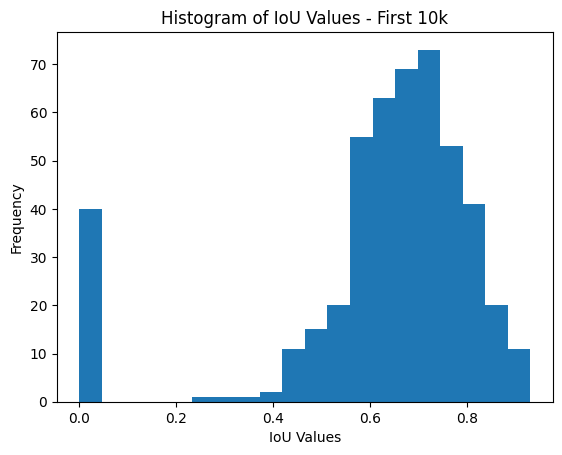

Mean IoU for First 10k: 0.62
Percentage of IoU > 0.3 for First 10k: 91.39%


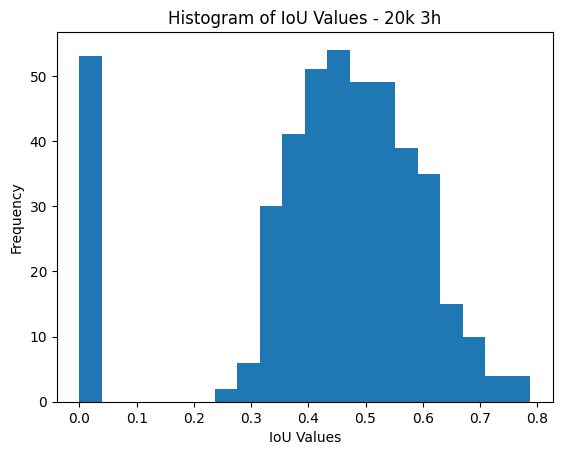

Mean IoU for 20k 3h: 0.43
Percentage of IoU > 0.3 for 20k 3h: 87.33%


In [17]:
import numpy as np
def plot_iou_statistics(iou_list, title):
    iou_values = [iou for _, iou in iou_list]

    # Plot the histogram
    plt.hist(iou_values, bins=20)
    plt.xlabel('IoU Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of IoU Values - {title}')
    plt.show()

    # Calculate the mean IoU 
    mean_iou = round(np.mean(iou_values), 2)
    print(f"Mean IoU for {title}: {mean_iou}")

    # Percentage of IoU > 0.3
    iou_03 = round(len([iou for iou in iou_values if iou > 0.3]) / len(iou_values) * 100, 2)
    print(f"Percentage of IoU > 0.3 for {title}: {iou_03}%")

plot_iou_statistics(get_iou_first10k, "First 10k")
plot_iou_statistics(get_iou_20k, "20k 3h")


# log runtime
# first 10k: 2:50
# 10k 1h: 2:58
# 20k 3h: 3:03

===== Mean Values Comparison =====
train/box_loss: Model 10k Mean = 1.0549, Model 20k Mean = 1.1215
train/cls_loss: Model 10k Mean = 0.5094, Model 20k Mean = 0.5368
train/dfl_loss: Model 10k Mean = 1.0554, Model 20k Mean = 1.2430
metrics/precision(B): Model 10k Mean = 0.9778, Model 20k Mean = 0.9637
metrics/recall(B): Model 10k Mean = 0.9313, Model 20k Mean = 0.9167
metrics/mAP50(B): Model 10k Mean = 0.9642, Model 20k Mean = 0.9561
metrics/mAP50-95(B): Model 10k Mean = 0.6854, Model 20k Mean = 0.6148
val/box_loss: Model 10k Mean = 1.0929, Model 20k Mean = 1.3296
val/cls_loss: Model 10k Mean = 0.4561, Model 20k Mean = 0.5511
val/dfl_loss: Model 10k Mean = 1.0670, Model 20k Mean = 1.2881


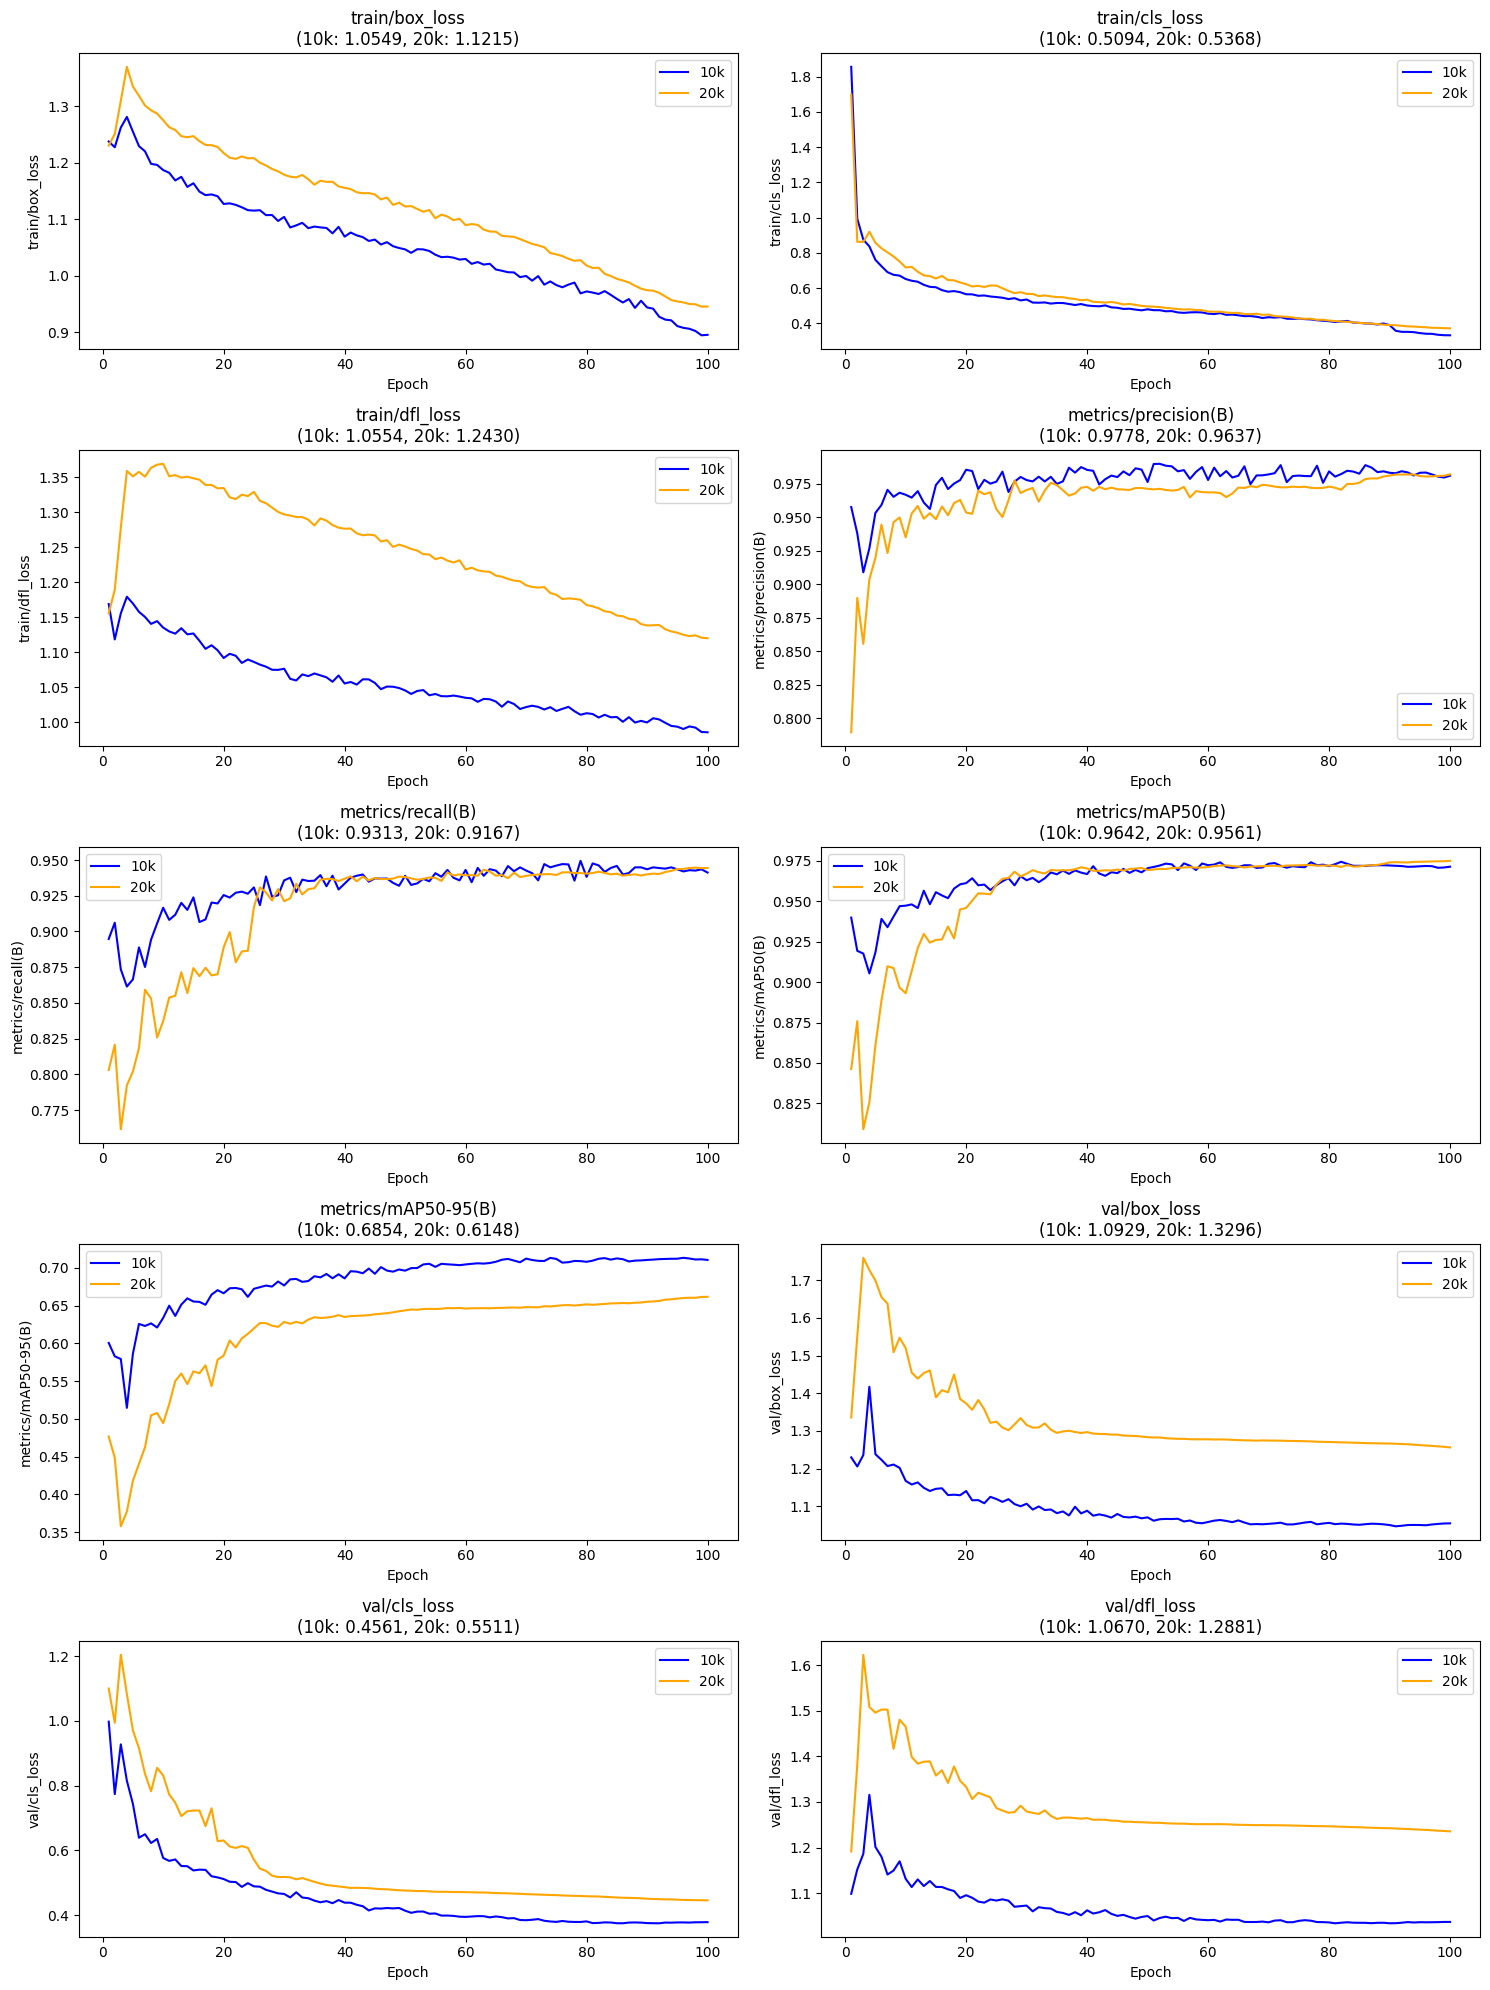

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
model_first10k_csv_path = r"models\first10ktrain\results.csv"
model_20k_csv_path = r"models\20kaugment3h+\results.csv"

model_first10k_csv = pd.read_csv(model_first10k_csv_path)
model_20k_csv = pd.read_csv(model_20k_csv_path)

metrics = [
    "train/box_loss",
    "train/cls_loss",
    "train/dfl_loss",
    "metrics/precision(B)",
    "metrics/recall(B)",
    "metrics/mAP50(B)",
    "metrics/mAP50-95(B)",
    "val/box_loss",
    "val/cls_loss",
    "val/dfl_loss",
]

model_10k_mean = {}
model_20k_mean = {}

for metric in metrics:
    if metric in model_first10k_csv.columns and metric in model_20k_csv.columns:
        model_10k_mean[metric] = model_first10k_csv[metric].mean()
        model_20k_mean[metric] = model_20k_csv[metric].mean()
    else:
        print(f"Metric '{metric}' not found in one of the CSV files.")
        
print("===== Mean Values Comparison =====")
for metric in metrics:
    if metric in model_10k_mean and metric in model_20k_mean:
        print(f"{metric}: Model 10k Mean = {model_10k_mean[metric]:.4f}, Model 20k Mean = {model_20k_mean[metric]:.4f}")

num_metrics = len(metrics)
fig, axes = plt.subplots(nrows=(num_metrics + 1) // 2, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    if metric in model_first10k_csv.columns and metric in model_20k_csv.columns:
        ax.plot(model_first10k_csv["epoch"], model_first10k_csv[metric], label="10k", color="blue")
        ax.plot(model_20k_csv["epoch"], model_20k_csv[metric], label="20k", color="orange")
        ax.set_title(f"{metric}\n(10k: {model_10k_mean[metric]:.4f}, 20k: {model_20k_mean[metric]:.4f})")
        #ax.set_title(metric)
        ax.set_xlabel("Epoch")
        ax.set_ylabel(metric)
        ax.legend()
    else:
        print(f"Metric '{metric}' not found in one of the CSV files.")

# Adjust layout
plt.tight_layout()

# Save and show plots
plt.savefig("model_comparison.png")
plt.show()

# Comparision of the models
===== Mean Values Comparison =====
train/box_loss: Model 10k Mean = 1.0549, Model 20k Mean = 1.1215 # cut off
train/cls_loss: Model 10k Mean = 0.5094, Model 20k Mean = 0.5368 # cut off
train/dfl_loss: Model 10k Mean = 1.0554, Model 20k Mean = 1.2430 # cut off
metrics/precision(B): Model 10k Mean = 0.9778, Model 20k Mean = 0.9637 # emphasis 
metrics/recall(B): Model 10k Mean = 0.9313, Model 20k Mean = 0.9167 # emphasis 
metrics/mAP50(B): Model 10k Mean = 0.9642, Model 20k Mean = 0.9561 # emphasis 
metrics/mAP50-95(B): Model 10k Mean = 0.6854, Model 20k Mean = 0.6148 # emphasis 
val/box_loss: Model 10k Mean = 1.0929, Model 20k Mean = 1.3296 # cut off
val/cls_loss: Model 10k Mean = 0.4561, Model 20k Mean = 0.5511 # cut off
val/dfl_loss: Model 10k Mean = 1.0670, Model 20k Mean = 1.288 # cut off


In [57]:
# Now run our double detection on the pictures
from safe_video import ObjectDetection, filter_results, merge_results_list
rec = ObjectDetection()
img_size = 10
result_list = []
for picture in pictures:
    image = plt.imread(picture)
    results = rec.process_image(image, [["car", 
                                         "truck", 
                                         "motorcycle", 
                                         "bus",                                        
                                         "License_Plate"
                                         ], "License_Plate"],
                                verbose = True)
    merged_results = merge_results_list(results)
    
    result_list.append(merged_results)
    #merged_results = merge_results_list(results)

    # plt.figure(figsize=(img_size, img_size))
    # plt.imshow(merged_results.plot())
    # plt.show()



0: 480x640 1 License_Plate, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 352x640 (no detections), 19.0ms
Speed: 1.0ms preprocess, 19.0ms inference, 0.0ms postprocess per image at shape (1, 3, 352, 640)

0: 480x640 1 License_Plate, 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 cars, 11.0ms
Speed: 3.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 288x640 (no detections), 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 640)

0: 512x640 1 License_Plate, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)

0: 352x640 (no detections), 16.0ms
Speed: 1.0ms preprocess, 16.0ms inference,

395

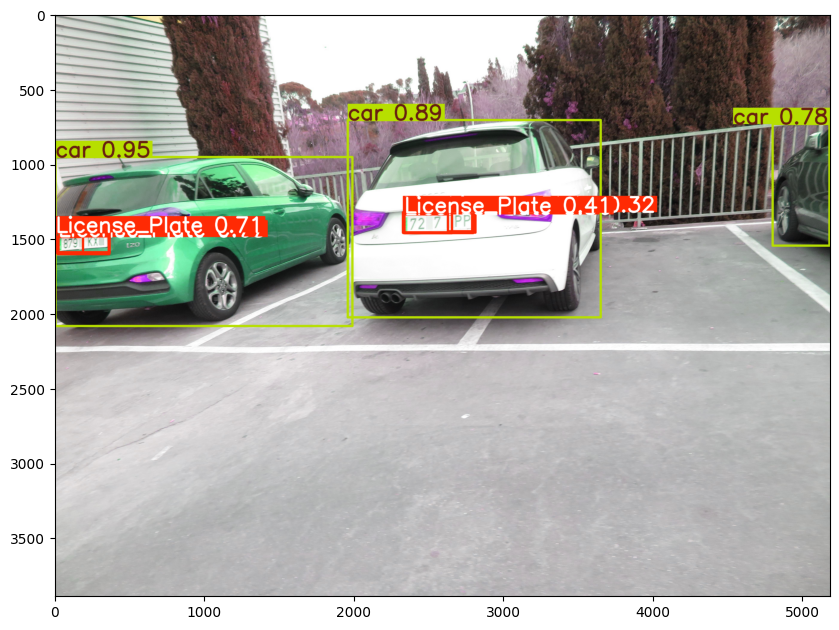

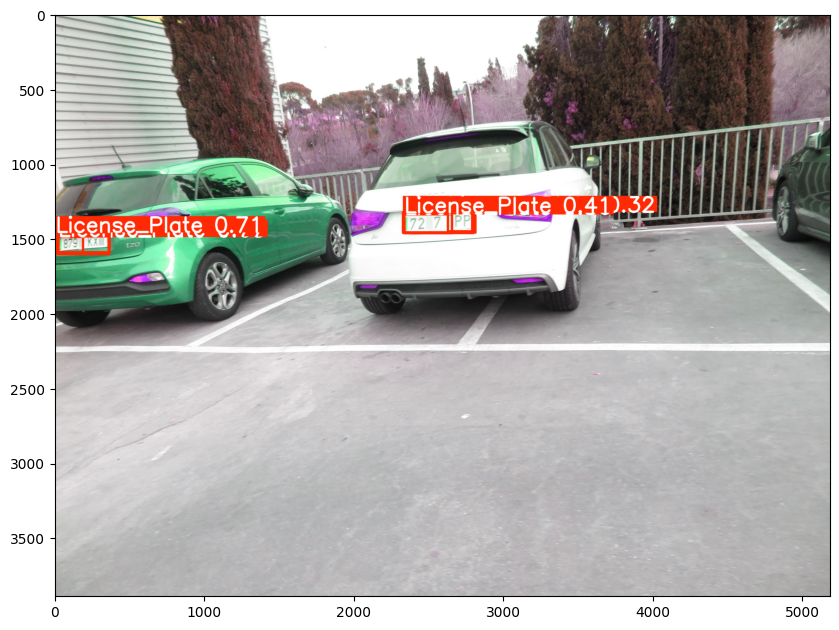

In [62]:
display(len(result_list))

# test 
stuff = result_list[6]
# print(stuff)
# print("-------------------------------------------------")

plt.figure(figsize=(img_size,img_size))
plt.imshow(stuff.plot())
plt.show()

filtered = filter_results(stuff, "License_Plate")
plt.figure(figsize=(img_size,img_size))
plt.imshow(filtered.plot())
plt.show()

# -------


# merged = merge_results_list(result_list)

# filtered_results =  []
# for result in result_list:
#     filtered = filter_results(result, "License_Plate")
#     filtered_results.append(filtered)
    
#result_list = filter_results(result_list, "License_Plate")